# Waterbomb cell - 5 parameter folding

In [1]:
import sympy as sp
sp.init_printing()
import numpy as np

## Upper right corner node

Control parameters $a, b, c$ and angle $\alpha$

In [2]:
a, b, c = sp.symbols('a, b, c', positive=True)
gamma = sp.symbols('gamma', positive=True)

Position variables to be determined for the above control parameters

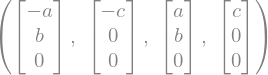

In [3]:
U_ur_0 = sp.Matrix([a, b, 0])
U_ul_0 = sp.Matrix([-a, b, 0])
V_r_0 = sp.Matrix([c, 0, 0])
V_l_0 = sp.Matrix([-c, 0, 0])
U_ul_0, V_l_0, U_ur_0, V_r_0

# Solution based on constant sector angles

In [50]:
x_ur, y_ur, z_ur = sp.symbols(r'x^{\urcorner}, y^{\urcorner}, z^{\urcorner}')
x_ul, y_ul, z_ul = sp.symbols(r'x^{\ulcorner}, y^{\ulcorner}, z^{\ulcorner}')

Node $V^\dashv$ rotates in the $xz$ plane. The control angle $\gamma = \pi/2$ for a flat state, i.e. $z^\dashv(\gamma=\pi/2) = 0$
\begin{align}
 V^\dashv = [c \sin(\gamma), 0, c \cos(\gamma)]
\end{align}

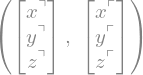

In [5]:
U_ur_1 = sp.Matrix([x_ur, y_ur, z_ur])
U_ul_1 = sp.Matrix([x_ul, y_ul, z_ul])
U_ur_1, U_ul_1

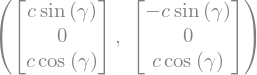

In [6]:
V_r_1 = sp.Matrix([c * sp.sin(gamma), 0, c * sp.cos(gamma)])
V_l_1 = sp.Matrix([-c * sp.sin(gamma), 0, c * sp.cos(gamma)])
V_r_1, V_l_1

Positions of $U^\urcorner_0$ and $V^\dashv_0$ 

In [7]:
UV_r_0 = V_r_0 - U_ur_0

## Scalar product between the vetors $OU^\urcorner$ and $OV^\dashv$.

Express the lengths $|OU^{\urcorner}|$ and $|U^{\urcorner}V^\dashv|$ in initial state

In [8]:
X_UOV_r_0 = U_ur_0.T * V_r_0
X_UOV_r_0

In [9]:
X_UOV_r_1 = U_ur_1.T * V_r_1
X_UOV_r_1

In [10]:
Eq_UOV_r = sp.Eq( X_UOV_r_0[0], X_UOV_r_1[0])
Eq_UOV_r

## Scalar product between $U^\urcorner V^\dashv$ and $U^{\urcorner}O$

In [11]:
X_VUO_r_0 = (V_r_0 - U_ur_0).T * (-U_ur_0)
X_VUO_r_0

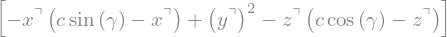

In [12]:
X_VUO_r_1 = (V_r_1 - U_ur_1).T * (-U_ur_1)
X_VUO_r_1

In [13]:
Eq_VUO_r = sp.Eq( -X_VUO_r_0[0], -X_VUO_r_1[0])
Eq_VUO_r

In [14]:
yz_ur_sol1, yz_ur_sol2 = sp.solve({Eq_UOV_r, Eq_VUO_r}, [y_ur, z_ur])

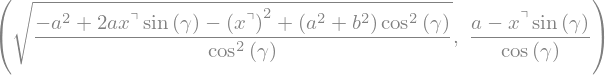

In [15]:
yz_ur_sol1

In [16]:
y_ur_sol, z_ur_sol = yz_ur_sol1

## Solved for $U^\urcorner$ with $x^\urcorner$ as a free parameter

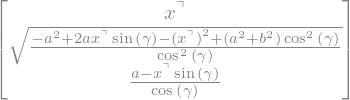

In [33]:
U_ur_x = sp.Matrix([x_ur, y_ur_sol, z_ur_sol])
U_ur_x

## Scalar product between $OU^\ulcorner$ and $OV^\vdash$

In [34]:
X_VOU_0 = (U_ul_0).T * (V_r_0)
X_VOU_0

In [35]:
X_VOU_1 = (U_ul_1).T * (V_r_1)
X_VOU_1

In [36]:
Eq_VOU_l = sp.Eq(X_VOU_0[0], X_VOU_1[0])
Eq_VOU_l

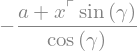

In [37]:
z_ul_sol = sp.solve(Eq_VOU_l, z_ul)[0]
z_ul_sol

In [38]:
U_ul_xy = U_ul_1.subs(z_ul, z_ul_sol)

## Scalar product between $U^\ulcorner V^\vdash$ and $U^{\ulcorner}O$

In [39]:
X_VUO_l_0 = (V_l_0 - U_ul_0).T * (-U_ul_0)
X_VUO_l_0

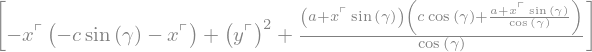

In [40]:
X_VUO_l_1 = (V_l_1 - U_ul_xy).T * (-U_ul_xy)
X_VUO_l_1

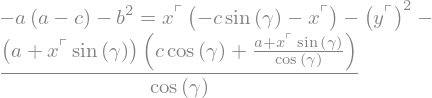

In [41]:
Eq_VUO_l = sp.Eq( -X_VUO_l_0[0], -X_VUO_l_1[0])
Eq_VUO_l

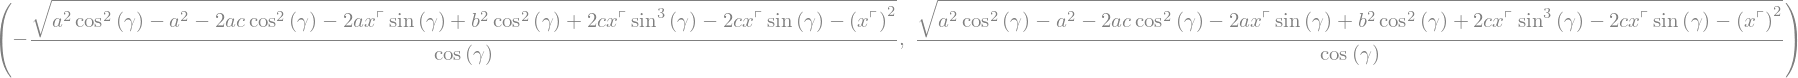

In [42]:
y_ul_sol_1, y_ul_sol_2 = sp.solve(Eq_VUO_l, y_ul)
y_ul_sol_1, y_ul_sol_2

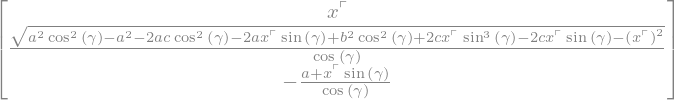

In [43]:
U_ul_x = U_ul_xy.subs(y_ul, y_ul_sol_2)
U_ul_x

## Scalar product between $OU^\ulcorner$ and $OU^\urcorner$

In [44]:
X_UOU_0 = (U_ul_0).T * (U_ur_0)
X_UOU_0

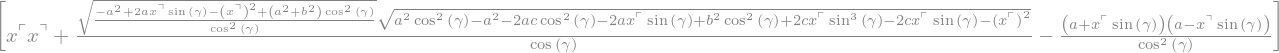

In [45]:
X_UOU_1 = (U_ul_x).T * (U_ur_x)
X_UOU_1

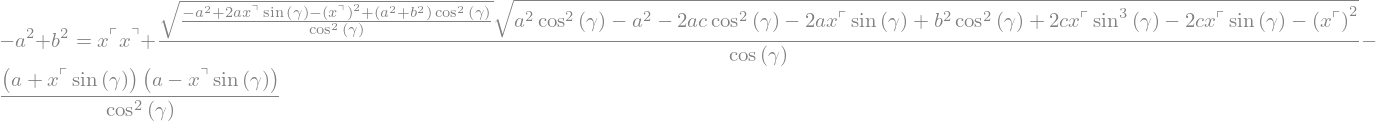

In [46]:
Eq_UOU = sp.Eq(X_UOU_0[0], X_UOU_1[0])
Eq_UOU

In [58]:
x_ur_sol1_pi3, x_ur_sol2_pi3 = sp.solve( Eq_UOU.subs( gamma, sp.pi/3 ), x_ur)

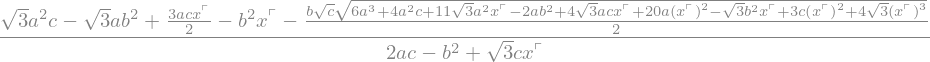

In [59]:
x_ur_sol1_pi3

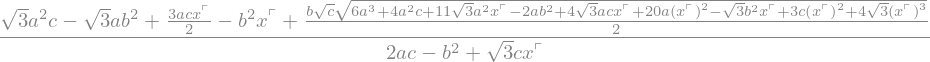

In [60]:
x_ur_sol2_pi3

In [61]:
x_ur_sol1_pi6, x_ur_sol2_pi6 = sp.solve( Eq_UOU.subs( gamma, sp.pi/6 ), x_ur)

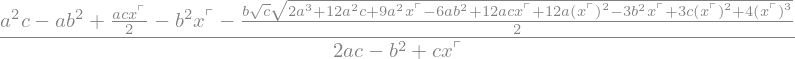

In [62]:
x_ur_sol1_pi6

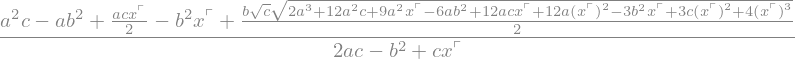

In [63]:
x_ur_sol2_pi6

# Solution with constant edge lengths 

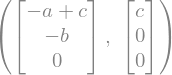

In [29]:
L2_U_ur_0 = (U_ur_0.T * U_ur_0)[0]
L2_UV_r_0 = (UV_r_0.T * UV_r_0)[0]
UV_r_0, V_r_0

And in a general state of folding

In [30]:
UV_r_1 = U_ur_1 - V_r_l
L2_U_ur_1 = (U_ur_1.T * U_ur_1)[0]
L2_UV_r_1 = (UV_r_1.T * UV_r_1)[0]

In [21]:
L2_U_ur_1

In [22]:
L2_UV_r_1.subs()

ValueError: subs accepts either 1 or 2 arguments

Use the two quadratic equations to find $y^{\urcorner}$ and $z^\urcorner$ 

In [31]:
Eq_L2_U_ur = sp.simplify(sp.Eq(L2_U_ur_1-L2_U_ur_0,0))
y_ur_sol = sp.solve(Eq_L2_U_ur, y_ur)[0]
Eq_L2_UV_r = sp.simplify(sp.Eq(L2_UV_r_1-L2_UV_r_0,0))
Eq_L2_UV_r_z_ur = Eq_L2_UV_r.subs(y_ur, y_ur_sol)
z_ur_sol = sp.solve(Eq_L2_UV_r_z_ur, z_ur)[0]
U_ur = sp.Matrix([x_ur, y_ur_sol.subs(z_ur, z_ur_sol), z_ur_sol])

The resulting position of $U^\urcorner$ reads

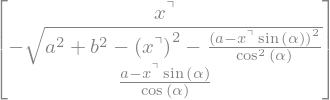

In [23]:
U_ur

Check the obtained coordinates for $\lim_{\alpha \rightarrow 0} U^\urcorner$ for $x^\urcorner = a$

In [24]:
[sp.limit( U_ur.subs(x_ur,a)[idx], alpha, sp.pi/2) for idx in [0,1,2]]

In a symmetric case, the other corner points can be simply mirrored 
with respect to the symmetry planes $xz$ and $xy$.

## Upper left corner in non-symmetric case
Considering the upper left corner, we can reuse the solution of the upper right corner by
substituting $U^{\urcorner} = - U^\ulcorner$
and alternating the sign of the $x$ coordinate. 

In [12]:
x_ul = sp.symbols(r'x^{\ulcorner}')

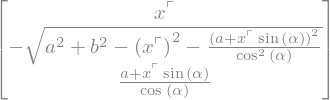

In [13]:
U_ul = U_ur.subs(x_ur, -x_ul)
U_ul[0] *= -1
U_ul

Check the limits

In [14]:
[sp.limit( U_ul.subs(x_ul,-a)[idx], alpha, sp.pi/2) for idx in [0,1,2]]

Define a vector $U^{\ulcorner\urcorner}$ as

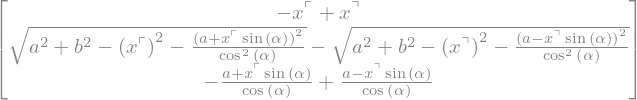

In [14]:
UU_u_1 = U_ur - U_ul
UU_u_1

Verify that by substituting $u^\urcorner = a$ and $u^\ulcorner = -1$ the symmetric case is recovered

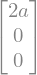

In [15]:
UU_u_1.subs({x_ur:a, x_ul:-a})

Considering again the non-symmetric configuration let us calculate the squaer of the vector length $| U^{\ulcorner\urcorner} |^2$

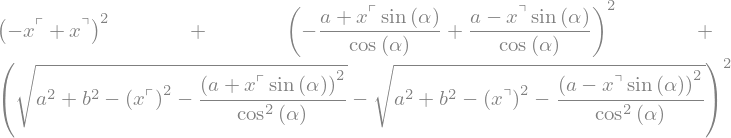

In [16]:
L2_UU_u_1 = (UU_u_1.T * UU_u_1)[0]
L2_UU_u_1

In [17]:
eta = sp.symbols('eta')

To control the twist of the non-symmetric fold mode of the waterbomb base, let us link $x^\ulcorner$ with 
$x^\urcorner$ by setting
\begin{align}
 x^\ulcorner = - \eta \, x^\urcorner
\end{align}

In [18]:
x_ul_ = - eta * x_ur

and substitute for $x^\ulcorner$ in $|U^{\ulcorner\urcorner}|^2$ to obtain

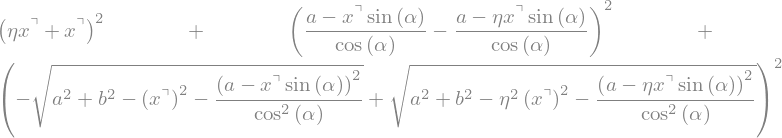

In [19]:
L2_UU_u_1_eta = L2_UU_u_1.subs(x_ul,x_ul_)
L2_UU_u_1_eta

Finally, require that the length $|U^{\ulcorner\urcorner}| = 2a$ is equal to the original length
at any state of folding

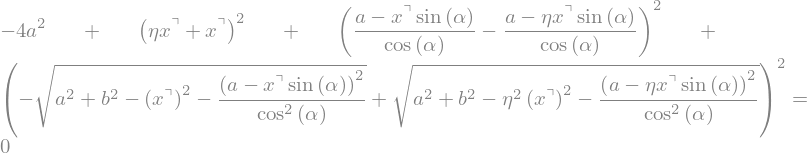

In [20]:
Eq_L2_UU_u_1 = sp.Eq(L2_UU_u_1_eta-(2*a)**2, 0)
Eq_L2_UU_u_1

The solver 

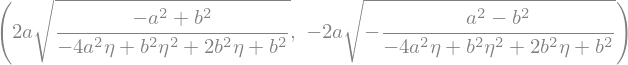

In [21]:
x_ur_sol_1, x_ur_sol_2 = sp.solve(Eq_L2_UU_u_1.subs(alpha,0), x_ur)
x_ur_sol_1, x_ur_sol_2

$\eta = 1$ recovers the symmetric case

In [22]:
sp.simplify(x_ur_sol_1.subs(eta,1))